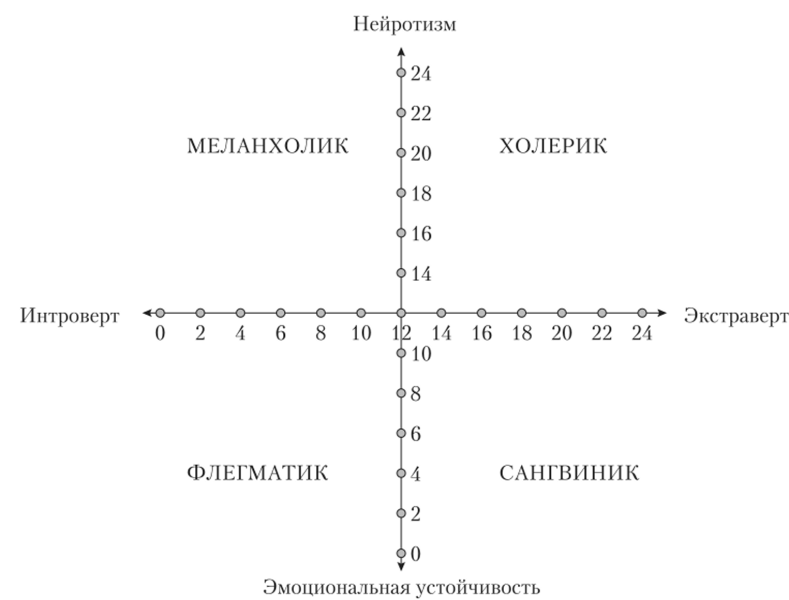

In [1]:
from IPython.display import Image
Image(filename='74.png') 

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('final_df.csv', index_col=None)
x_df = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
for col in ['y1', 'y2', 'y3']:
    maximum = 24
    minimum = 0
    for i in range(len(df)):
        df[col][i] = (df[col][i] - minimum) / (maximum - minimum)
df.head(3)

C:\Temp\ipykernel_9584\385927036.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = (df[col][i] - minimum) / (maximum - minimum)


,x1,x2,x3,x4,x5,x6,x7,x8,y1,y2,y3,y4
0,0.042910,0.479867,0.326449,0.433326,0.382672,0.465480,0.190446,0.397645,0.750000,0.291667,0.000000,S
1,0.368204,0.300108,0.137281,0.693128,0.082646,0.608697,0.244211,0.678460,0.666667,0.833333,0.125000,H
2,0.132022,0.404171,0.283180,0.412292,0.619138,0.420939,0.260122,0.547084,0.791667,0.791667,0.041667,H


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

mdic = {
    'linear': LinearRegression(),
    'ridge': Ridge(alpha=0.5),
    'lasso': Lasso(alpha=0.5),
    'bayesian': BayesianRidge(),
    'forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0),
    'boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=0)
}
mdic2 = {
    'linear': LinearRegression(),
    'ridge': Ridge(alpha=0.5),
    'lasso': Lasso(alpha=0.5),
    'bayesian': BayesianRidge(),
    'forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0),
    'boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=0)
}
mdic3 = {
    'linear': LinearRegression(),
    'ridge': Ridge(alpha=0.5),
    'lasso': Lasso(alpha=0.5),
    'bayesian': BayesianRidge(),
    'forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0),
    'boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=0)
}

In [4]:
for name, model in mdic.items():
    model.fit(x_df, df[f'y1'])
    df[f'y1_{name}'] = model.predict(x_df)

for name2, model2 in mdic2.items():
    model2.fit(x_df, df[f'y2'])
    df[f'y2_{name2}'] = model2.predict(x_df)

for name3, model3 in mdic3.items():
    model3.fit(x_df, df[f'y3'])
    df[f'y3_{name3}'] = model3.predict(x_df)

for name in mdic.keys():
    df[f'y4_{name}'] = 0

In [5]:
for name in mdic.keys():
    for i in range(len(df)):
        if df[f'y1_{name}'].iloc[i] >= 0.5 and df[f'y2_{name}'].iloc[i] >= 0.5:
            df[f'y4_{name}'].iloc[i] = 'H'
        elif df[f'y1_{name}'].iloc[i] >= 0.5 and df[f'y2_{name}'].iloc[i] < 0.5:
            df[f'y4_{name}'].iloc[i] = 'S'
        elif df[f'y1_{name}'].iloc[i] < 0.5 and df[f'y2_{name}'].iloc[i] >= 0.5:
            df[f'y4_{name}'].iloc[i] = 'M'
        else:
            df[f'y4_{name}'].iloc[i] = 'F'

C:\Temp\ipykernel_9584\1828267413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'y4_{name}'].iloc[i] = 'H'
C:\Temp\ipykernel_9584\1828267413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'y4_{name}'].iloc[i] = 'S'


In [6]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y1,y2,...,y3_lasso,y3_bayesian,y3_forest,y3_boosting,y4_linear,y4_ridge,y4_lasso,y4_bayesian,y4_forest,y4_boosting
0,0.042910,0.479867,0.326449,0.433326,0.382672,0.465480,0.190446,0.397645,0.750000,0.291667,...,0.12156,0.121326,0.056460,0.001569,H,H,H,H,S,S
1,0.368204,0.300108,0.137281,0.693128,0.082646,0.608697,0.244211,0.678460,0.666667,0.833333,...,0.12156,0.117496,0.103392,0.124472,H,H,H,H,H,H
2,0.132022,0.404171,0.283180,0.412292,0.619138,0.420939,0.260122,0.547084,0.791667,0.791667,...,0.12156,0.122292,0.095492,0.042464,H,H,H,H,H,H
3,0.130896,0.301918,0.231081,0.615435,0.302473,0.489208,0.183350,0.397366,0.666667,0.625000,...,0.12156,0.118985,0.091212,0.123530,H,H,H,H,H,H
4,0.002269,0.494586,0.328696,0.460111,0.401516,0.488032,0.195303,0.460727,0.583333,0.291667,...,0.12156,0.121715,0.091218,0.062976,H,H,H,H,S,S


In [7]:
for model in mdic.keys():
    print(f'-----------{model}-----------')
    for y in ['y1', 'y2', 'y3']:
        try:
            print(y, ', R^2:', r2_score(df[y], df[f'{y}_{model}']))
        except:
            print(y, ', R^2:', 'error')
    t = 0
    for i in range(len(df)):
        if df[f'y4_{model}'].iloc[i] == df['y4'].iloc[i]:
            t+=1
    print('Accuracy:', t/len(df))

-----------linear-----------
y1 , R^2: 0.9056214059202076
y2 , R^2: 0.9298783804314302
y3 , R^2: 0.9174478368614537
Accuracy: 0.6330275229357798
-----------ridge-----------
y1 , R^2: 0.9092088323542393
y2 , R^2: 0.9329169057368137
y3 , R^2: 0.9217907992053674
Accuracy: 0.6238532110091743
-----------lasso-----------
y1 , R^2: error
y2 , R^2: error
y3 , R^2: error
Accuracy: 0.6330275229357798
-----------bayesian-----------
y1 , R^2: 0.9483163268149047
y2 , R^2: 0.9895737466796141
y3 , R^2: 0.9857929756462765
Accuracy: 0.6330275229357798
-----------forest-----------
y1 , R^2: 0.6612045905590753
y2 , R^2: 0.6328459730357767
y3 , R^2: 0.6435194560851711
Accuracy: 0.7981651376146789
-----------boosting-----------
y1 , R^2: 0.95411532431191
y2 , R^2: 0.9539821646142417
y3 , R^2: 0.9241371791040315
Accuracy: 0.9174311926605505
